## DB = Eleicao e NovosCandidatos

In [27]:
library(corrgram)

eleicao = read.csv('Eleicao.csv', sep=';', stringsAsFactors=T)
dim(eleicao)
summary(eleicao)
head(eleicao)

[1] 47  3

             CANDIDATO     SITUACAO         DESPESAS   
  Gary Peterson   : 1   Min.   :0.0000   Min.   :  10  
  Pamela Bryant   : 1   1st Qu.:0.0000   1st Qu.: 300  
 Andrea Washington: 1   Median :1.0000   Median : 800  
 Annie Brooks     : 1   Mean   :0.5106   Mean   :1086  
 Anthony Harris   : 1   3rd Qu.:1.0000   3rd Qu.:1700  
 Barbara White    : 1   Max.   :1.0000   Max.   :3300  
 (Other)          :41                                  

,CANDIDATO,SITUACAO,DESPESAS
,<fct>,<int>,<int>
1,George Turner,0,10
2,Victor Johnson,0,100
3,Jerry Perry,1,1600
4,Shirley Cook,1,1500
5,Carolyn Bailey,1,3300
6,Susan Sanders,0,200


## Despesas VS Situação
- grafico e visualização
- correlações -> cor()

[1] 0.8121872

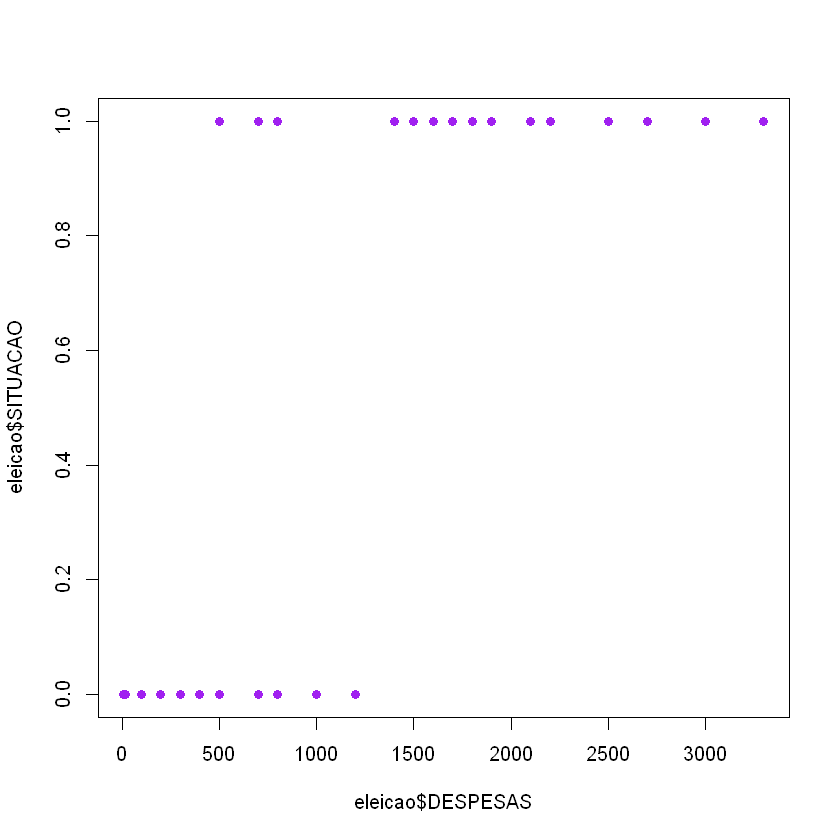

In [28]:
plot(eleicao$DESPESAS, eleicao$SITUACAO, pch=19, col='purple')
cor(eleicao$DESPESAS, eleicao$SITUACAO)

## Modelo Logistico
- glm() -> Retornma um modelo linear logistico - o g indica geral (função gnérica com muitas configurações)
- family= -> Indica a distribuição dos dados

In [29]:
modelo = glm(SITUACAO ~ DESPESAS, data=eleicao, family = 'binomial')
summary(modelo)


Call:
glm(formula = SITUACAO ~ DESPESAS, family = "binomial", data = eleicao)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.602880   1.315934  -3.498 0.000469 ***
DESPESAS     0.004984   0.001404   3.550 0.000385 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 65.135  on 46  degrees of freedom
Residual deviance: 18.540  on 45  degrees of freedom
AIC: 22.54

Number of Fisher Scoring iterations: 7


## points()
- Adiciona pontos a um grafico, no exemplo abaixo, utilizamos para gerar os valore ajustados (fitted)

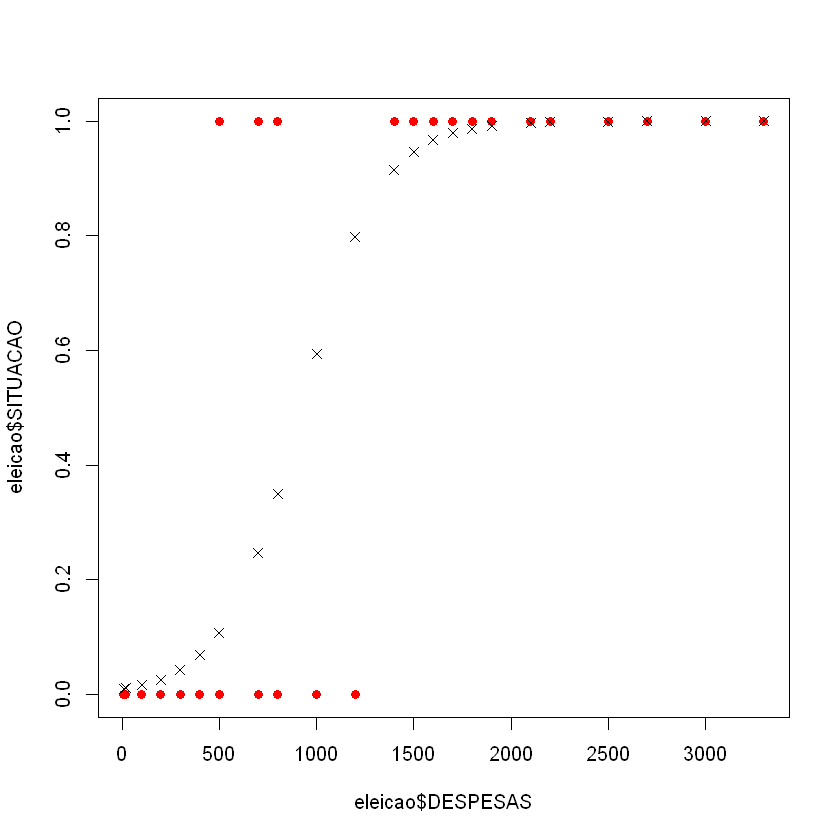

In [30]:
plot(eleicao$DESPESAS, eleicao$SITUACAO, pch=19, col='red')
points(eleicao$DESPESAS, modelo$fitted, pch=4, col='black')

## Previsões
- Utilizamos os mesmos dados para observar previsões
- Como um modelo retorna probabilidades, indicamos um teste lógico para True or False

In [31]:
prever = predict(modelo, newdata = eleicao, type='response')
prever = prever >= 0.5
prever

1     2     3     4     5     6     7     8     9    10    11    12    13 
FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE 
   40    41    42    43    44    45    46    47 
 TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE

## Tabela cruazando as previsoes com os dados originais
- diagonal principal (21, 21) - Previsões corretas
- diagonal secundaria (2, 3) - Previsões erradas

In [32]:
teste = table(prever, eleicao$SITUACAO)
teste
taxa_acerto = (teste[1] + teste[4]) / sum(teste)
taxa_acerto

       
prever   0  1
  FALSE 21  3
  TRUE   2 21

[1] 0.893617

## Modelo gerado | Utilização com novos dados
- Criamos a coluna RESULT para a nova base de dados

In [33]:
nova_eleicao = read.csv('NovosCandidatos.csv', sep=';', stringsAsFactors=T)
dim(nova_eleicao)
summary(nova_eleicao)
head(nova_eleicao)

[1] 7 2

 CANDIDATO    DESPESAS     
 A:1       Min.   :   0.0  
 B:1       1st Qu.: 105.0  
 C:1       Median : 500.0  
 D:1       Mean   : 872.9  
 E:1       3rd Qu.:1200.0  
 F:1       Max.   :3000.0  
 G:1                       

,CANDIDATO,DESPESAS
,<fct>,<int>
1,A,0
2,B,10
3,C,200
4,D,500
5,E,900
6,F,1500


In [34]:
nova_eleicao$RESULT = predict(modelo, newdata = nova_eleicao, type='response')
nova_eleicao$RESULT
nova_eleicao$RESULT = nova_eleicao$RESULT >= 0.5
nova_eleicao$RESULT

[1] 0.009923466 0.010425261 0.026438255 0.108027149 0.470635921 0.946475247
[7] 0.999967947

[1] FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE